In [1]:
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph, pinta_tikz

In [2]:
%%capture
%mkdir -p ~/temp
%cd ~/temp

# Enunciado

Se pretende construir una planta desalinizadora de agua, con el fin de proporcionar agua potable a ciertas poblaciones en las que escasea. Usted, como encargado de la planificación de la ejecución de este proyecto, decide que la descomposición en tareas y sus precedencias es la que se muestra en la tabla adjunta, donde la duración se expresa en meses.  

Tras un detenido análisis del proyecto en cuestión, usted ha llegado a la conclusión de que no es posible que la tarea J empiece nada más terminar la tarea A, sino que es absolutamente necesario que para que se pueda empezar a ejecutar la tarea J debe de haber transcurrido un mes después de terminar la tarea A. Se pide:  

In [3]:
pregunta_1 = "1. Dibujar el diagrama PERT del proyecto y caracteríce su duración mediante una distribución aleatoria Normal.  "
pregunta_2 = "2. Como no está conforme con la duración del proyecto que resulta, desea reducir la duración del proyecto en 1 mes con el mínimo incremento de coste posible. ¿Qué tareas deben ser reducidas?.  "
pregunta_3 = """3. Debido al racionamiento de combustible diesel que sufre la isla, durante el proyecto sólo será posible disponer de 250 litros de gasoil cada semana; y debido a la falta de previsión de los responsables del proyecto, que no solicitaron permiso para el almacenamiento de combustible, no es posible guardar el sobrante de una semana para consumirlo la siguiente. Por otro lado las necesidades de consumo de gasoil que usted planifica son las que se muestran en la tabla.  
- ¿Se encuentra bien nivelado el consumo de gasoil?.  
- ¿Se encuentra bien asignado?.  
- Si no es así ¿qué recomienda hacer para asignar correctamente el consumo de combustible?.  
- ¿Qué consecuencias traerá la asignación correcta del combustible en este proyecto en concreto?.  """

In [4]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))

1. Dibujar el diagrama PERT del proyecto y caracteríce su duración mediante una distribución aleatoria Normal.  

2. Como no está conforme con la duración del proyecto que resulta, desea reducir la duración del proyecto en 1 mes con el mínimo incremento de coste posible. ¿Qué tareas deben ser reducidas?.  

3. Debido al racionamiento de combustible diesel que sufre la isla, durante el proyecto sólo será posible disponer de 250 litros de gasoil cada semana; y debido a la falta de previsión de los responsables del proyecto, que no solicitaron permiso para el almacenamiento de combustible, no es posible guardar el sobrante de una semana para consumirlo la siguiente. Por otro lado las necesidades de consumo de gasoil que usted planifica son las que se muestran en la tabla.  
- ¿Se encuentra bien nivelado el consumo de gasoil?.  
- ¿Se encuentra bien asignado?.  
- Si no es así ¿qué recomienda hacer para asignar correctamente el consumo de combustible?.  
- ¿Qué consecuencias traerá la asignación correcta del combustible en este proyecto en concreto?.  

In [5]:
#| tbl-cap: "Cuadro de datos del enunciado del ejercicio"
#| label: tbl-datosEnunciado

import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes,        duracion, varianza, coste,   litros, duracion_tope
  ('A',       '---  ',               5,        2,    '600-60t',   210,    2),
  ('B',       '---  ',               5,        1,    '300-20t',   150,    2),
  ('C',       'B    ',               1,        1,    '100-30t',    50,    1),
  ('D',       'B    ',               5,        1,    '300-25t',    75,    1),
  ('E',       'B    ',               2,        1,    '200-30t',    25,    1),
  ('F',       'C,D,E',               1,        1,    '100-10t',    75,    1),
  ('G',       'D,E  ',               2,        1,    '200-10t',    75,    2),
  ('H',       'E    ',               2,        1,    '150-50t',     0,    1),
  ('I',       'K    ',               4,        1,    '500-50t',   100,    3),
  ('💤J',      'A    ',               1,        0,         None,     0,    1),
  ('J',       '💤J   ',               2,        1,    '100-10t',    50,    1),
  ('K',       'A    ',               3,        1,    '300-10t',    50,    3),
] ,columns=['actividad', 'precedentes', 'duracion', 'varianza', 'coste', 'litros', 'duracion_tope']).set_index('actividad')

datos_enunciado

,precedentes,duracion,varianza,coste,litros,duracion_tope
actividad,,,,,,
A,---,5,2,600-60t,210,2
B,---,5,1,300-20t,150,2
C,B,1,1,100-30t,50,1
D,B,5,1,300-25t,75,1
E,B,2,1,200-30t,25,1
F,"C,D,E",1,1,100-10t,75,1
G,"D,E",2,1,200-10t,75,2
H,E,2,1,150-50t,0,1
I,K,4,1,500-50t,100,3


# Solución
## Apartado 1

In [6]:
display(Markdown(pregunta_1))

1. Dibujar el diagrama PERT del proyecto y caracteríce su duración mediante una distribución aleatoria Normal.  

### Cuadro de prelaciones

Comenzamos construyendo el cuadro de prelaciones. Este cuadro nos permitirá construir los grafos Pert o Roy, si atendemos a la información de las filas; o comprobar si el grafo obtenido es correcto, atendiendo a la información de las columnas.

In [7]:
#| tbl-cap: "Cuadro de prelaciones expandido"
#| label: tbl-prelaciones
prelaciones = PredecessorTable.from_dataframe_of_strings(data=datos_enunciado, activity='actividad', predecessor='precedentes')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K,💤J
activities,,,,,,,,,,,,
A,,,,,,,,,,,,
B,,,,,,,,,,,,
C,,True,,,,,,,,,,
D,,True,,,,,,,,,,
E,,True,,,,,,,,,,
F,,,True,True,True,,,,,,,
G,,,,True,True,,,,,,,
H,,,,,True,,,,,,,
I,,,,,,,,,,,True,


### Grafo PERT con numeración de nodos

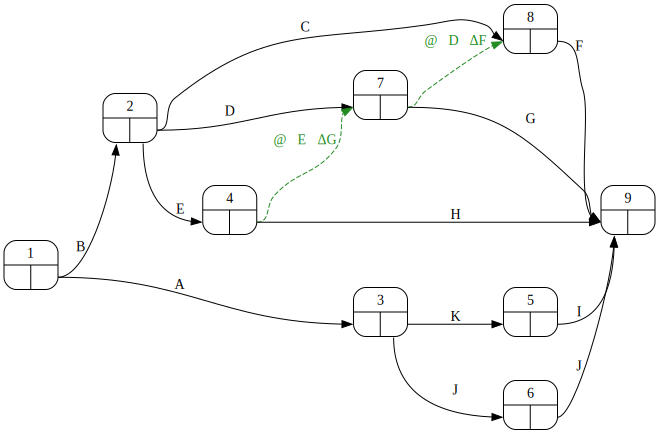

In [8]:
#| fig-cap: "Grafo Pert con indicación de los números de nodos"
#| label: fig-pertNumeracionNodos
proyecto = prelaciones.create_project()
datos_proyecto = datos_enunciado.copy()
proyecto.pert(nodesep=0.6)

### Matriz de Zaderenko

In [9]:
#| tbl-cap: "Matriz de Zaderenko para el cálculo de tiempos tempranos y tardíos"
#| label: tbl-Zaderenko
proyecto.zaderenko(durations=datos_proyecto['duracion'])

,1,2,3,4,5,6,7,8,9,early
1,,5.0,5.0,,,,,,,0.0
2,,,,2.0,,,5.0,1.0,,5.0
3,,,,,3.0,1.0,,,,5.0
4,,,,,,,0.0,,2.0,7.0
5,,,,,,,,,4.0,8.0
6,,,,,,,,,2.0,6.0
7,,,,,,,,0.0,2.0,10.0
8,,,,,,,,,1.0,10.0
9,,,,,,,,,,12.0
late,0.0,5.0,5.0,10.0,8.0,10.0,10.0,11.0,12.0,


Los tiempos tempranos y tardios han resultado ser:

In [10]:
#| tbl-cap: "Valores de los tiempos tempranos y tardíos de los nodos"
#| label: tbl-TempranosTardios
resultados_pert = proyecto.calculate_pert(durations=datos_proyecto['duracion'])
resultados_pert['nodes']

,early,late
1,0,0
2,5,5
3,5,5
4,7,10
5,8,8
6,6,10
7,10,10
8,10,11
9,12,12


In [11]:
duracion_media_proyecto = int(proyecto.duration(durations=datos_proyecto['duracion']))
Markdown(f"La información del nodo final del proyecto nos informa de la duración media del proyecto: {duracion_media_proyecto} periodos")

La información del nodo final del proyecto nos informa de la duración media del proyecto: 12 periodos

### Holgura total de las actividades
A partir de los tiempos tempranos y tardíos, y de las duraciones de las actividades, podemos determinar la holgura total de las actividades y con ellas las rutas del camino crítico.

In [12]:
#| tbl-cap: "Valor de la holgura total de las actividades"
#| label: tbl-htotal
resultados_pert['activities']

,H_total
@∇D⤑ΔF,1
@∇E⤑ΔG,3
A,0
B,0
C,5
D,0
E,3
F,1
G,0
H,3


### Camino crítico

El camino crítico consta de las siguientes rutas:

In [13]:
camino_critico = proyecto.critical_path(durations=datos_proyecto['duracion'])
for key, value in camino_critico.items():
    display(Markdown(f"{key}: \t " + ", ".join(value)))

Route_1: 	 A, I, K

Route_5: 	 B, D, G

### Calendario del proyecto
Se muestra a continuación el calendario del proyecto, con indicación de las fechas de inicio y fin más tempranas y tardías de cada actividad:

In [14]:
#| tbl-cap: "Calendario del proyecto"
#| label: tbl-calendario
calendario = proyecto.calendar(datos_proyecto['duracion'])
calendario

,inicio_mas_temprano,inicio_mas_tardio,fin_mas_temprano,fin_mas_tardio,H_total,duracion
actividad,,,,,,
A,0,0,5,5,0,5
B,0,0,5,5,0,5
C,5,10,6,11,5,1
D,5,5,10,10,0,5
E,5,8,7,10,3,2
F,10,11,11,12,1,1
G,10,10,12,12,0,2
H,7,10,9,12,3,2
I,8,8,12,12,0,4


### Grafo PERT con indicación de tiempos y rutas del camino crítico de acuerdo a la planificación inicial
A continuación se muestra el grafo Pert del proyecto, con indicación de las actividades críticas:

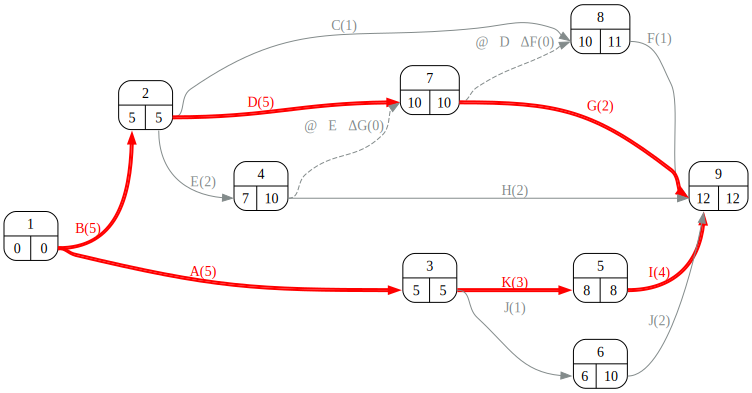

In [15]:
#| fig-cap: "Grafo Pert con indicación del camino crítico"
#| label: fig-pertrutasCriticas
proyecto.pert(durations=datos_proyecto['duracion'])

### Caracterización de la duración del proyecto mediante una distribución Normal
La caracterización de la distribución Normal consiste en determinar los valores de sus parámetros: media y desviación típica de su duración.

In [16]:
duracion_media_proyecto = int(proyecto.duration(datos_proyecto['duracion']))

In [17]:
Markdown(f"La duración media del proyecto ya la tenemos calculada: {duracion_media_proyecto} periodos")

La duración media del proyecto ya la tenemos calculada: 12 periodos

Para determinar la desviación típica debemos obtener en cada rama del camino crítico la suma de las varianzas, y quedarnos con la mayor.

In [18]:
desviacion_proyecto, varianza_rutas = proyecto.standard_deviation(durations=datos_proyecto['duracion'],
                                                   variances=datos_proyecto['varianza'])

In [19]:
#| tbl-cap: "Varianza de las rutas del camino crítico"
#| label: tbl-varianzaRutas
varianza_rutas

,Activities,Variance
Route_1,"A, I, K",4.00
Route_5,"B, D, G",3.00


In [20]:
Markdown(f"El proyecto sigue una distribución normal con media {duracion_media_proyecto} periodos y desviación típica {desviacion_proyecto}.")


El proyecto sigue una distribución normal con media 12 periodos y desviación típica 2.0.

## Apartado 2

In [21]:
display(Markdown(pregunta_2))

2. Como no está conforme con la duración del proyecto que resulta, desea reducir la duración del proyecto en 1 mes con el mínimo incremento de coste posible. ¿Qué tareas deben ser reducidas?.  

Para resolver la reducción del proyecto con mínimo coste es necesario obtener el valor del coste unitario de reducción a partir de los datos del enunciado.

In [22]:
datos_proyecto = datos_enunciado.copy()
datos_proyecto[['coste']]

,coste
actividad,
A,600-60t
B,300-20t
C,100-30t
D,300-25t
E,200-30t
F,100-10t
G,200-10t
H,150-50t
I,500-50t


Para obtener el coste unitario de reducción debemos quedarnos únicamente con el coeficiente que multiplica a la variable duración 't'.

In [23]:
datos_proyecto['cur'] = ( datos_proyecto.loc[:, 'coste']
                                        .str.split('[-+]', expand=True)[1]
                                        .str.split('t', expand=True)[0]
                                        .astype(float))
datos_proyecto[['cur']].T

actividad,A,B,C,D,E,F,G,H,I,💤J,J,K
cur,60.0,20.0,30.0,25.0,30.0,10.0,10.0,50.0,50.0,NaN,10.0,10.0


Se aborda la solución de este apartado mediante la récnica de reducción de la duración del proyecto con mínimo coste.

In [24]:
ackoff, best_option, duration, available = proyecto.ackoff(durations=datos_proyecto['duracion'],
                min_durations=datos_proyecto['duracion_tope'],
                costs=datos_proyecto['cur'],
                reduction=1)

In [25]:
#| tbl-cap: "Cuadro del algoritmo de Ackoff Sasieni"
#| label: tbl-ackoffƒ
ackoff

,A,B,C,D,E,F,G,H,I,J,K,💤J,0,1
Route_1,60.0,,,,,,,,50.0,,10.0,,12.0,11.0
Route_2,60.0,,,,,,,,,10.0,,,8.0,8.0
Route_3,,20.0,30.0,,,10.0,,,,,,,7.0,6.0
Route_4,,20.0,,25.0,,10.0,,,,,,,11.0,10.0
Route_5,,20.0,,25.0,,,10.0,,,,,,12.0,11.0
Route_6,,20.0,,,30.0,10.0,,,,,,,8.0,7.0
Route_7,,20.0,,,30.0,,10.0,,,,,,9.0,8.0
Route_8,,20.0,,,30.0,,,50.0,,,,,9.0,8.0
0,3.0,3.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,,
1,3.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,,


En la Ruta 5 (B-D-G) la actividad más barata es la G pero ya está en su duración tope. La siguiente más barata es la actividad B que dispone de 3 periodos de reducción.

Se propone reducir la B y la I.

## Apartado 3.

In [26]:
display(Markdown(pregunta_3))

3. Debido al racionamiento de combustible diesel que sufre la isla, durante el proyecto sólo será posible disponer de 250 litros de gasoil cada semana; y debido a la falta de previsión de los responsables del proyecto, que no solicitaron permiso para el almacenamiento de combustible, no es posible guardar el sobrante de una semana para consumirlo la siguiente. Por otro lado las necesidades de consumo de gasoil que usted planifica son las que se muestran en la tabla.  
- ¿Se encuentra bien nivelado el consumo de gasoil?.  
- ¿Se encuentra bien asignado?.  
- Si no es así ¿qué recomienda hacer para asignar correctamente el consumo de combustible?.  
- ¿Qué consecuencias traerá la asignación correcta del combustible en este proyecto en concreto?.  

Consideramos el coste mensual cuatro veces el semanal:

In [27]:
#| tbl-cap: "Cuadro de coste mensual del combustible"
#| label: tbl-costeMensual
datos_proyecto['litros_por_mes'] = 4 * datos_enunciado['litros']   # Se considera el gasto mensual 4 veces el coste semanal
datos_proyecto[['litros_por_mes']].T

actividad,A,B,C,D,E,F,G,H,I,💤J,J,K
litros_por_mes,840,600,200,300,100,300,300,0,400,0,200,200


In [28]:
gantt_recursos, dibujo = proyecto.gantt(datos_proyecto,
                                'duracion',
                                'litros_por_mes',
                                total='fila',
                                holguras=True,
                                tikz=True)

De acuerdo con la planificación inicial, el consumo de combustible resulta ser:

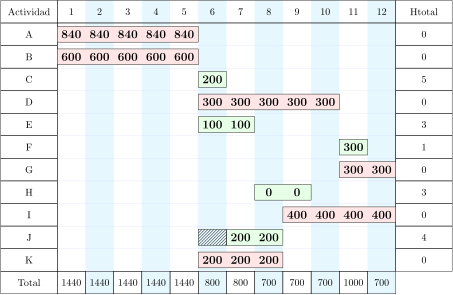

In [29]:
#| fig-cap: "Distribución inicial del consumo de recursos"
#| label: fig-recursosInicial
pinta_tikz(dibujo)

La zona rayada antes de J representa la espera de 1 periodo mencionada en el enunciado.

La fila "Total" obtenida, que podemos representar gráficamente en la siguiente figura, proporciona la información del consumo previsto de recursos a lo largo del tiempo.

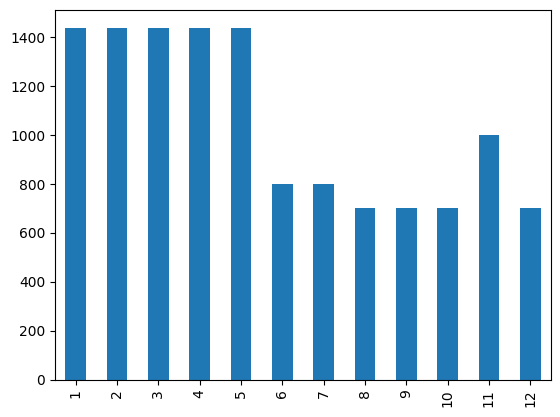

In [30]:
#| fig-cap: "Diagrama de cargas antes de aplicar el algoritmo de asignación"
#| label: fig-preAsignacionBarras
(gantt_recursos.data.loc['Total'].drop('H_total').plot(kind='bar'));

La demanda del recurso no se encuentra nivelada.
Además, con el máximo disponible de 1000 litros por mes el proyecto no es ejecutable en su estado actual y debe aplicarse el algoritmo de asignación.

### Algoritmo de asignación

Durante los primeros seis periodos no es viable ejecutar A y B. Como ambas son críticas y de misma duración resulta indiferente desplazar una u otra pues en ambos casos esta acción conlleva un retraso del proyecto. Resolvemos el ejercicio desplazando la actividad B.

In [31]:
proyecto_asignacion = proyecto.copy()
duracion_y_recursos = datos_proyecto[['duracion', 'litros_por_mes']]
datos_proyecto_tras_asignar, gantt_df, dibujo  = proyecto_asignacion.asignar(
                                    data=duracion_y_recursos,
                                    duration_label='duracion',
                                    resource_label='litros_por_mes',
                                    maximo=[1000],
                                    report=False
                                    )


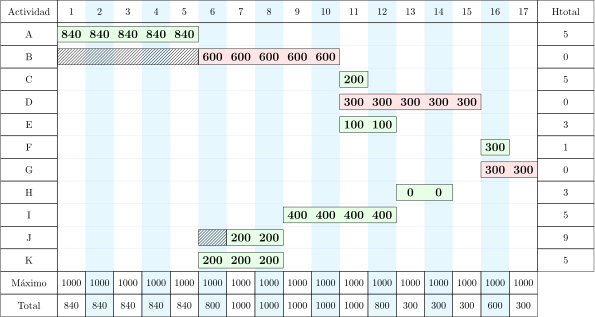

In [32]:
#| fig-cap: "Diagrama de Gantt del proyecto una vez aplicado el algoritmo de asignación"
#| label: fig-postAsignacion
pinta_tikz(dibujo)

La zona rayada representa el desplazamiento de la tarea _B_.

Con esta única acción la demanda de recursos del proyecto ya no supera las 1000 unidades que nos ponía de límite en el enunciado. La duración no obstante ha subido a 17 meses y el camino crítico ha cambiado.

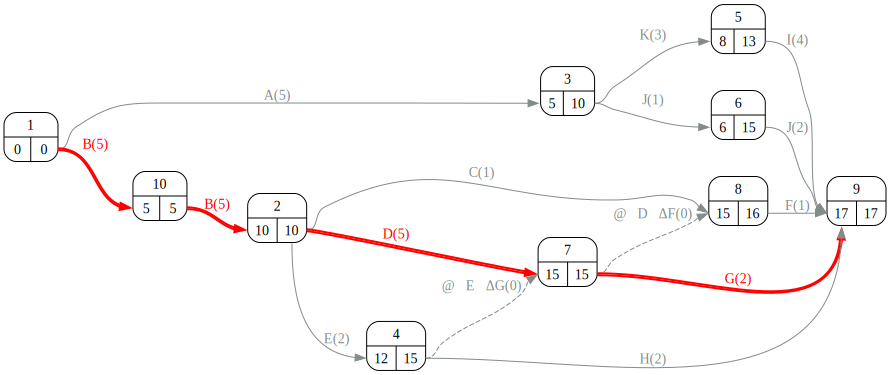

In [33]:
proyecto_asignacion.pert(durations=datos_proyecto_tras_asignar['duracion'])

In [34]:
camino_critico = proyecto_asignacion.critical_path(durations=datos_proyecto_tras_asignar['duracion'])
for key, value in camino_critico.items():
    display(Markdown(f"{key}: \t " + ", ".join(value)))

Route_5: 	 B, D, G, 💤B

Este resultado cumple los requerimientos expresados en el enunciado. No obstante, resultará sorprendente que la actividad 💤B sea crítica al inicio del proyecto cuando representa una espera, mientras la actividad A dispone de holgura total 5 5 y no es crítica.
Realmente, al imponer el enunciado en este apartado un límite máximo de recursos que impide que A y B puedan ejecutarse simultaneamente, ha sido equivalente a añadir una restricción de prelación entre A y B que obliga que B se ejecute después de A; y por tanto A podría considerarse crítica en esa nueva configuración.

Podría abundarse más en otras posibles consideraciones y alternativas de solución pero éstas escapan del alcance de la aplicación estricta del método de asignación de  Wiest-Levy básico explicado en el curso.